Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [4]:
plastic = pd.read_csv("D:/DataScience/regression/PlasticSales(1).csv")
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [5]:
plastic.head(6)

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107


In [6]:
plastic['Month'][0]
p=plastic['Month'][0]
p
p[0:3]

'Jan'

In [7]:
plastic['month'] = 0

In [8]:
for i in range(60):
    p=plastic['Month'][i]
    plastic['month'][i]= p[0:3]

C:\Users\agnis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\agnis\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
dummy = pd.DataFrame(pd.get_dummies(plastic['month']))

plastic1=pd.concat((plastic,dummy),axis=1)

In [10]:
plastic1.head()

,Month,Sales,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
t = np.arange(1,61)
plastic1['t']=t
t_square = plastic1['t']*plastic1['t']
plastic1['t_square'] = t_square

In [12]:
log_Sales = np.log(plastic1['Sales'])

In [13]:
plastic1['log_Sales']= log_Sales

In [14]:
train = plastic1.head(48)
test = plastic1.tail(12)

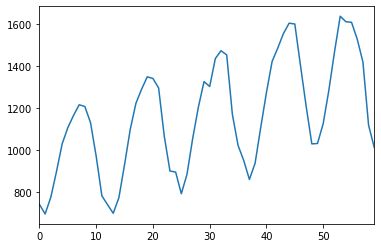

In [15]:
plastic1.Sales.plot()

In [16]:
import statsmodels.formula.api as smf
#linear model
linear_model= smf.ols('Sales~t',data=train).fit()
linear_model
predlinear= pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_lin= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predlinear))**2))
rmse_lin

260.93781425111206

In [17]:
#quadratic model
quad_model=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
predquad

48    1419.358869
49    1434.597938
50    1450.023585
51    1465.635809
52    1481.434611
53    1497.419990
54    1513.591946
55    1529.950481
56    1546.495592
57    1563.227282
58    1580.145549
59    1597.250393
dtype: float64

In [18]:
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))

In [19]:
#exponential model
exp_model=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmse_exp

268.69383850025605

In [20]:
#additive seasonality
add_sea=smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_addsea=pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add= np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_addsea))**2))
rmse_add

235.60267356646546

In [21]:
#additve with linear
add_sealin=smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddlin=pd.Series(add_sealin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddlin= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlin))**2))
rmseaddlin

135.5535958348214

In [22]:
#additive with quadratic
add_seaquad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddquad= pd.Series(add_seaquad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmseaddquad= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

218.19387584887005

In [23]:
#multiplicative seasonaity
mul_lin= smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmul=pd.Series(mul_lin.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemul=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

239.65432143121123

In [24]:
#multiplicative additive seasonality
mul_add= smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmuladd= pd.Series(mul_add.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemuladd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmuladd)))**2))
rmsemuladd


160.6833294719365

In [25]:
#multiplicative additive quadratic
mul_quad = smf.ols('log_Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmulquad= pd.Series(mul_add.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemulquad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmulquad)))**2))
rmsemulquad

160.6833294719365

In [26]:
#tabular form of rmse
data={'MODEL': pd.Series(['rmse_add','rmse_exp','rmse_lin','rmse_quad','rmseaddlin','rmseaddquad','rmsemul','rmsemuladd','rmsemulquad']), 'ERROR_VALUES':pd.Series([rmse_add,rmse_exp,rmse_lin,rmse_quad,rmseaddlin,rmseaddquad,rmsemul,rmsemuladd,rmsemulquad])}
table_rmse= pd.DataFrame(data)
table_rmse

,MODEL,ERROR_VALUES
0,rmse_add,235.602674
1,rmse_exp,268.693839
2,rmse_lin,260.937814
3,rmse_quad,297.406710
4,rmseaddlin,135.553596
5,rmseaddquad,218.193876
6,rmsemul,239.654321
7,rmsemuladd,160.683329
8,rmsemulquad,160.683329


In [27]:
plasticnew1= pd.read_csv("D:/DataScience/regression/PlasticSales(1).csv")

In [28]:
plasticnew1['month'] = 0

In [29]:
for i in range(60):
    p=plasticnew1['Month'][i]
    plasticnew1['month'][i]= p[0:3]

C:\Users\agnis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
dummy1 = pd.DataFrame(pd.get_dummies(plasticnew1['month']))
plasticnew1 = pd.concat((plasticnew1,dummy1),axis=1)

In [31]:
t = np.arange(1,61)
plasticnew1['t']=t
t_square = plasticnew1['t']*plasticnew1['t']
plasticnew1['t_square'] = t_square

In [32]:
plasticnew1.head()

,Month,Sales,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [33]:
finalmodel = smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=plastic1).fit()
predictfinal = pd.Series(finalmodel.predict(plasticnew1[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
predictfinal

0      688.566667
1      633.166667
2      716.366667
3      872.366667
4     1031.566667
5     1159.566667
6     1187.566667
7     1249.366667
8     1247.366667
9     1196.566667
10     962.366667
11     802.366667
12     780.283333
13     724.883333
14     808.083333
15     964.083333
16    1123.283333
17    1251.283333
18    1279.283333
19    1341.083333
20    1339.083333
21    1288.283333
22    1054.083333
23     894.083333
24     872.000000
25     816.600000
26     899.800000
27    1055.800000
28    1215.000000
29    1343.000000
30    1371.000000
31    1432.800000
32    1430.800000
33    1380.000000
34    1145.800000
35     985.800000
36     963.716667
37     908.316667
38     991.516667
39    1147.516667
40    1306.716667
41    1434.716667
42    1462.716667
43    1524.516667
44    1522.516667
45    1471.716667
46    1237.516667
47    1077.516667
48    1055.433333
49    1000.033333
50    1083.233333
51    1239.233333
52    1398.433333
53    1526.433333
54    1554.433333
55    1616

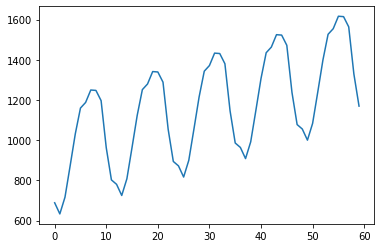

In [34]:
plt.plot(predictfinal)

In [35]:

plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")

plastic["month"] = plastic.Date.dt.strftime("%b")
plastic["year"] =plastic.Date.dt.strftime("%Y") # year extraction


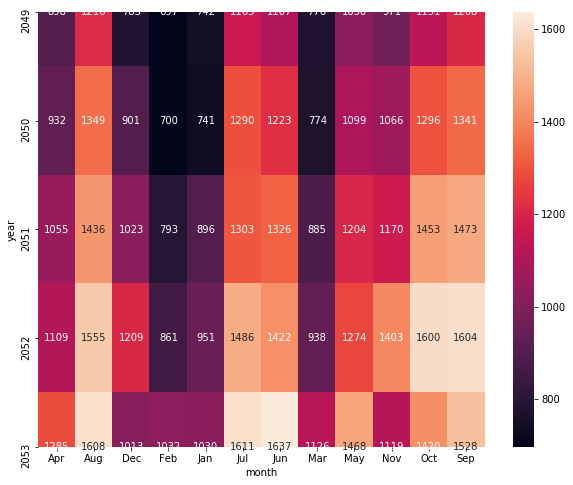

In [36]:
# Some EDA on Time series data 
# Heat map visualization
plt.figure(figsize=(10,8))
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean")
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


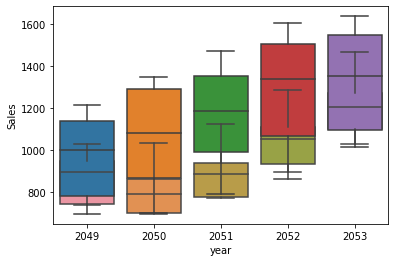

In [37]:
sns.boxplot(x="month",y="Sales",data=plastic)
sns.boxplot(x="year",y="Sales",data=plastic)

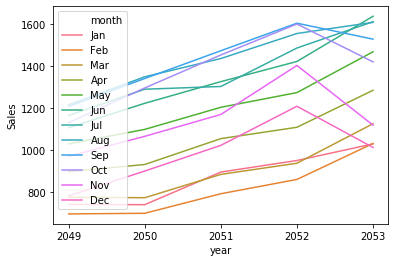

In [38]:
sns.lineplot(x="year",y="Sales",hue="month",data=plastic)


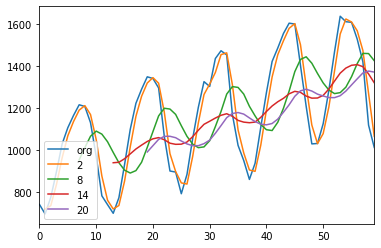

In [39]:
plastic.Sales.plot(label="org")
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

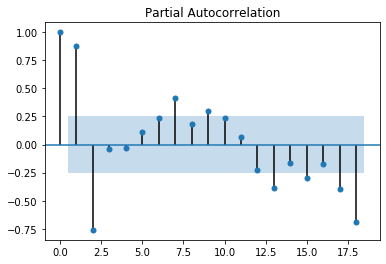

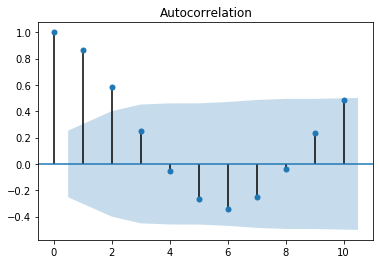

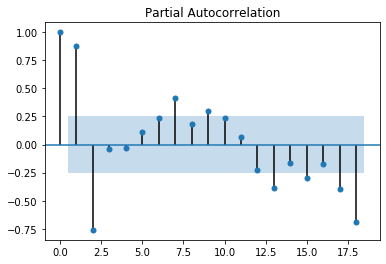

In [40]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(plastic.Sales,lags=10)
tsa_plots.plot_pacf(plastic.Sales)


In [41]:
# splitting the data into Train and Test data and considering the last 12 months data as 

Train = plastic.head(48)
Test = plastic.tail(12)

In [42]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [43]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

17.041518935231107

In [44]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\agnis\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


101.98514998256634

In [45]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

15.002141910017977